In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
sales_train_df = pd.read_csv('train.csv')
sales_train_df.head()

C:\Users\Carlos\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Data columns of sales_train_df:
* Store: Store ID.
* DayOfWeek: 1 -> Monday, 7 -> Sunday.
* Date: Date (yyyy-mm-dd).
* Sales: Total sales on that day. Target column.
* Customers: Total customers on that day.
* Open: 1 -> Open, 0 -> Closed.
* Promo: 1 -> With a promo on that day, 0 -> Without a promo.
* StateHoliday -> Describes the holidays on that day. a -> bank holiday, b = easter holiday, c = christmas, 0 = not holiday.
* SchoolHoliday -> Describes the holidays of the schools. 1 -> Holidays, 0 -> Not holidays.

In [3]:
# Quick check of the variables with info and describe.

sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
# We also have another csv, with info about the stores.

store_info_df = pd.read_csv('store.csv')
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Data columns of store_info_df:
* Store: Store ID.
* StoreType: Describes the type of store (a, b, c, d).
* Assortment: a -> basic, b -> extra, c -> extended.
* CompetitionDistance: Distance (in meters) to the closest competitor.
* CompetitionOpenSinceMonth: Month when competitors opened.
* CompetitionOpenSinceYear: Year when competitors opened.
* Promo2: 0 -> Not in the promo, 1 -> the store is in the promo.
* Promo2SinceWeek: Week when the store started in the promo2.
* Promo2SinceYear: Year when the store started in the promo2.
* PromoInterval: Months when the promo is up.

In [6]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Data cleaning

In [8]:
# Lets start cleaning sales_train_df
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>],
       [<AxesSubplot:title={'center':'SchoolHoliday'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

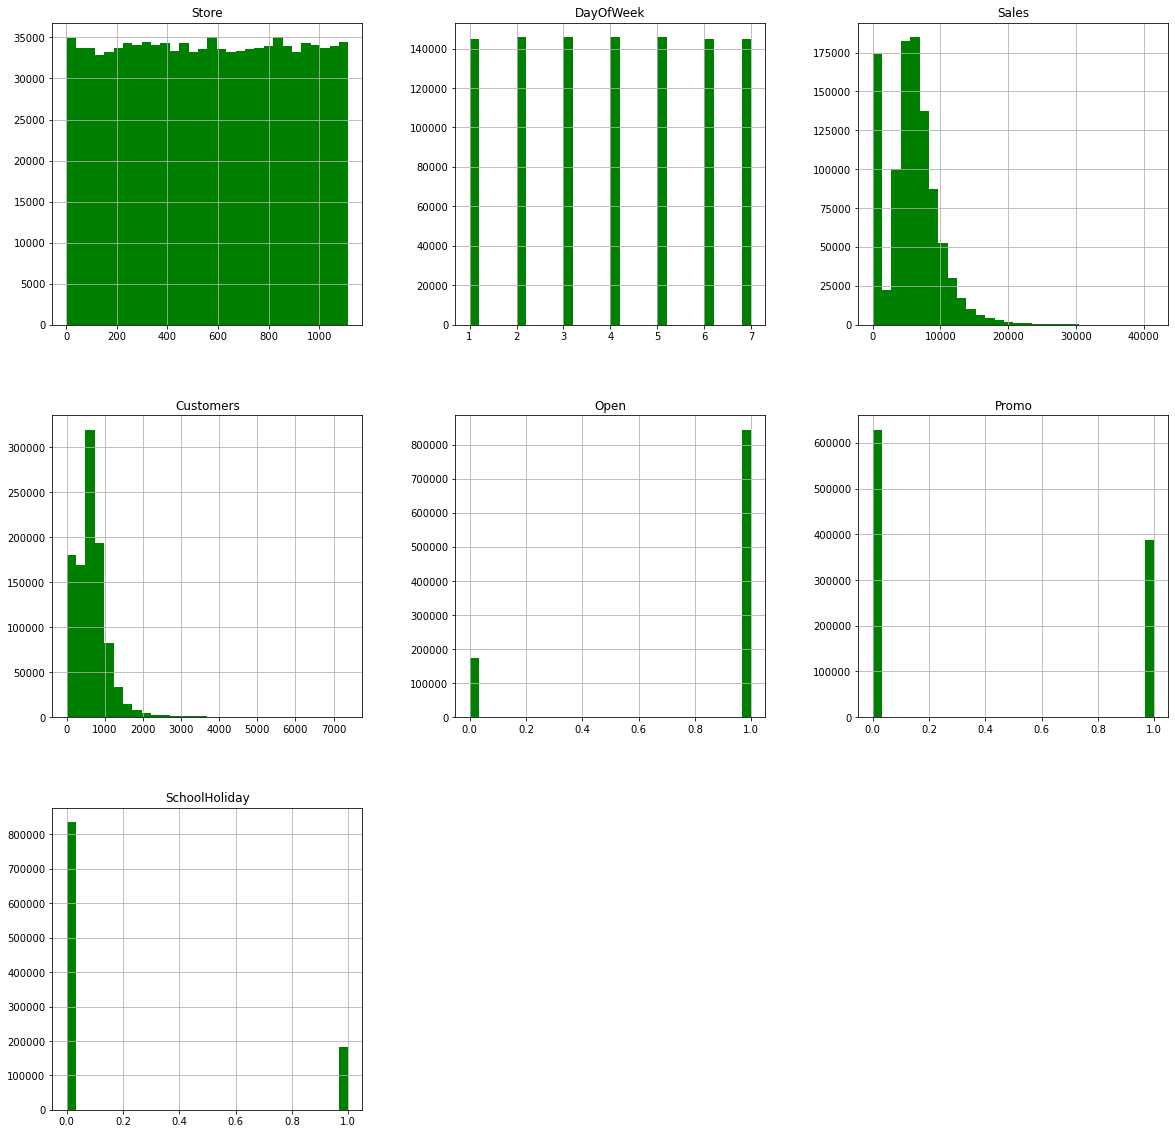

In [9]:
# There are no missing data.
# We can plot all the variables with a hist

sales_train_df.hist(bins = 30, figsize=(20,20), color = 'g')

* Sales and customers have a similar distribution.
* Stores are open aroung 80% of time.
* Promo is up about 40% of time.
* School holidays are abount 20% of time.

In [10]:
# Lets separate the dataframe in 2, one for opened stores and one for closed stores.

closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df   = sales_train_df[sales_train_df['Open'] == 1]

print("Total = {} ".format(len(sales_train_df)))
print("Open data = {}".format(len(open_train_df)))
print("Closed data = {}".format(len(closed_train_df)))
print("Closed data percentage = {}%".format(100.0*len(closed_train_df)/len(sales_train_df)))

Total = 1017209 
Open data = 844392
Closed data = 172817
Closed data percentage = 16.98933060954042%


In [11]:
# We only need open data, so we will drop all the closed data.
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

# At this poing, we can drop 'Open' column as it didnt give us any info.
sales_train_df.drop(['Open'], axis = 1, inplace = True)

sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [12]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


After this cleaning, we can see how data changed, such as 'Sales' mean, it is now 1200€ higher than it was.

In [13]:
# Lets do som cleaning for store_info_df as well.
store_info_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [14]:
# We have 3 rows where 'CompetitionDistance' is null.
# We have 354 rows where 'CompetitionOpenSinceMonth' and 'CompetitionOpenSincheYear' is null.
# We have 544 rows where 'PromoInterval', 'Promo2SinceWeek' and 'Promo2SinceYear' is null.

In [15]:
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [16]:
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [17]:
store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [18]:
# There are 3 rows for 'CompetitionDistance', we are gonna fill them with 'CompetitionDistance' mean.
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace=True)

In [19]:
# When 'Promo2' is 0, 'PromoInterval', 'Promo2SinceWeek' and 'Promo2SinceYear' are nulls. We can fill them with zeros.
# We can also fill with zeros the 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear'.
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

for str in str_cols:
    store_info_df[str].fillna(0, inplace = True)

In [20]:
store_info_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

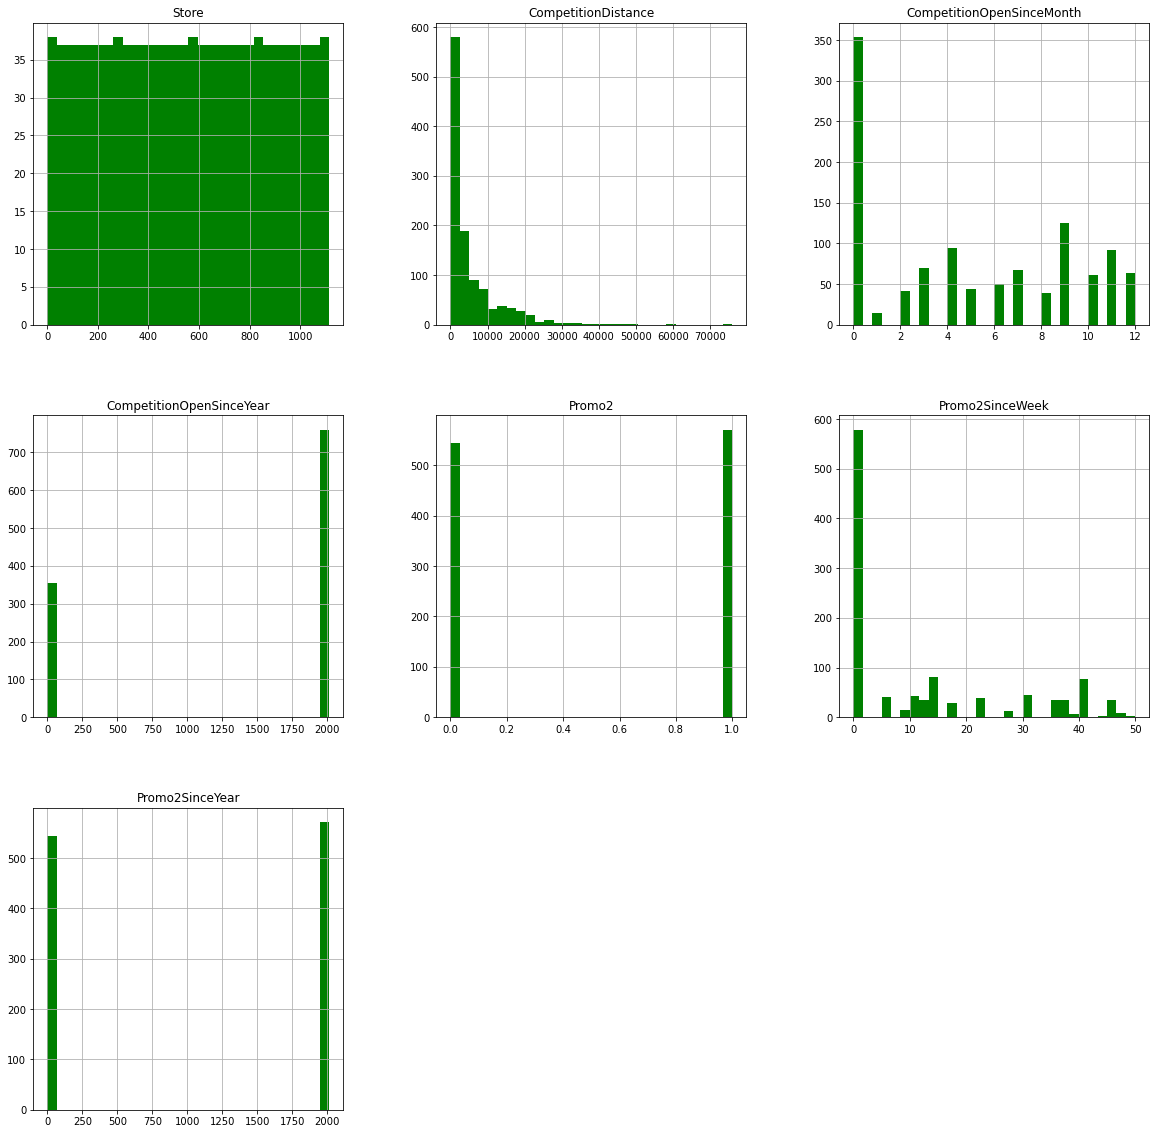

In [21]:
# Now we can visualize some data.
store_info_df.hist(bins = 30, figsize=(20,20), color = 'g')

* Half stores are in Promo2.
* Half stores competitors are below 5km distance.

In [22]:
# Now we can merge both datasets usin the column Store:
sales_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store')

In [23]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


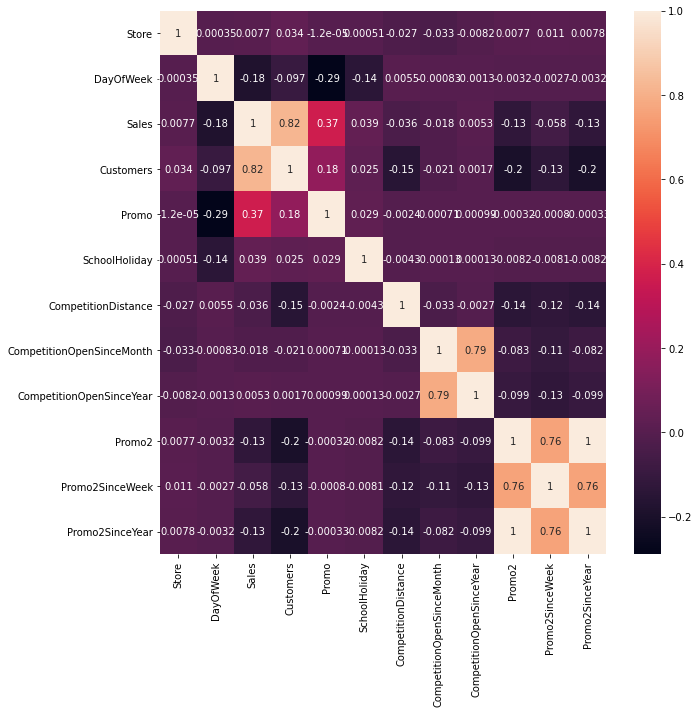

In [24]:
correlations = sales_df.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlations, annot=True)
plt.style.use('fivethirtyeight')

* Strong positive correlation between 'Sales', 'Customers' and 'Promo'.
* Inverse correlation between 'DayOfWeek' and 'Sales' and 'Promo'.

In [25]:
# Lets make a column for year, month and day to visualize the data.
sales_df['Year'] = pd.DatetimeIndex(sales_df['Date']).year
sales_df['Month'] = pd.DatetimeIndex(sales_df['Date']).month
sales_df['Day'] = pd.DatetimeIndex(sales_df['Date']).day

In [26]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


Text(0.5, 0, 'Month')

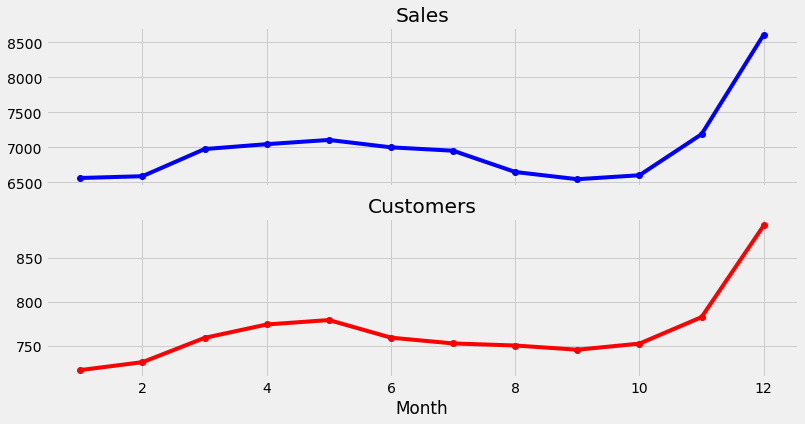

In [27]:
# Using groupby, we can group data by day of week, day of month and month.

# Starting group by month.
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.plot(sales_df.groupby('Month')[['Sales']].mean(), 'bo-')
ax1.set_title('Sales')

ax2.plot(sales_df.groupby('Month')[['Customers']].mean(), 'ro-')
ax2.set_title('Customers')
ax2.set_xlabel('Month')

# As expected, sales grow a lot in November and December, due to christmas, and decrease during January and February.

Text(0.5, 0, 'Day')

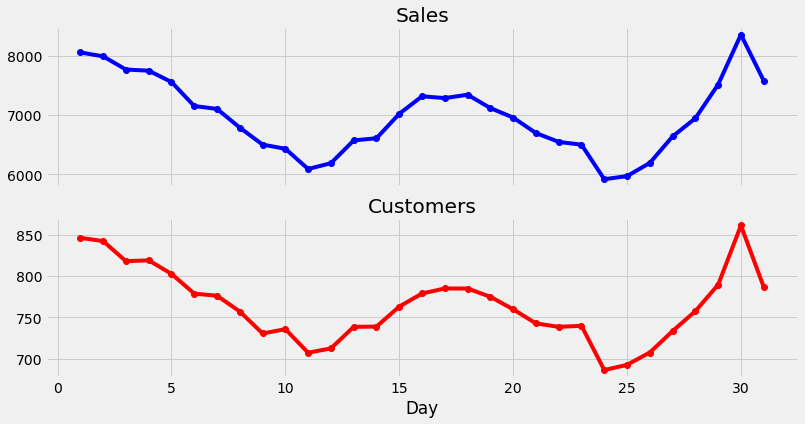

In [28]:
# Group by day of a month.
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.plot(sales_df.groupby('Day')[['Sales']].mean(), 'bo-')
ax1.set_title('Sales')

ax2.plot(sales_df.groupby('Day')[['Customers']].mean(), 'ro-')
ax2.set_title('Customers')
ax2.set_xlabel('Day')

# Sales are higher during 30-31-1.
# We have another peak around day 17-18.

Text(0.5, 0, 'Day')

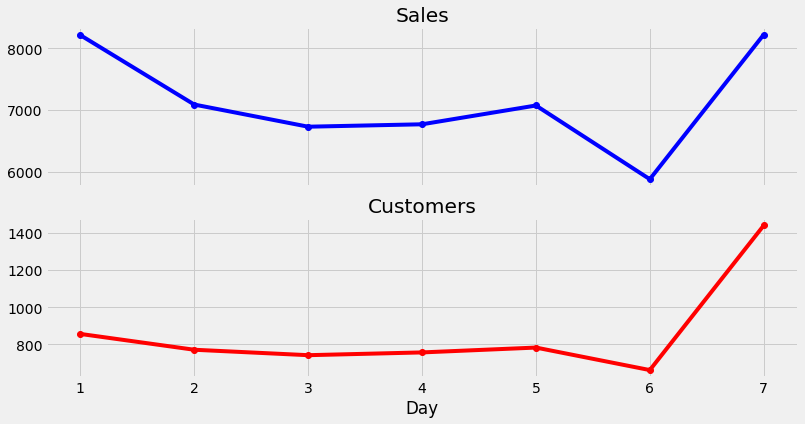

In [29]:
# Group by day of a week.
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.plot(sales_df.groupby('DayOfWeek')[['Sales']].mean(), 'bo-')
ax1.set_title('Sales')

ax2.plot(sales_df.groupby('DayOfWeek')[['Customers']].mean(), 'ro-')
ax2.set_title('Customers')
ax2.set_xlabel('Day')

# Higher sales are on Sunday-Monday.
# Higher customers are on Sunday, but not Monday. On Mondays there are more sales with less customers.

<AxesSubplot:xlabel='Date'>

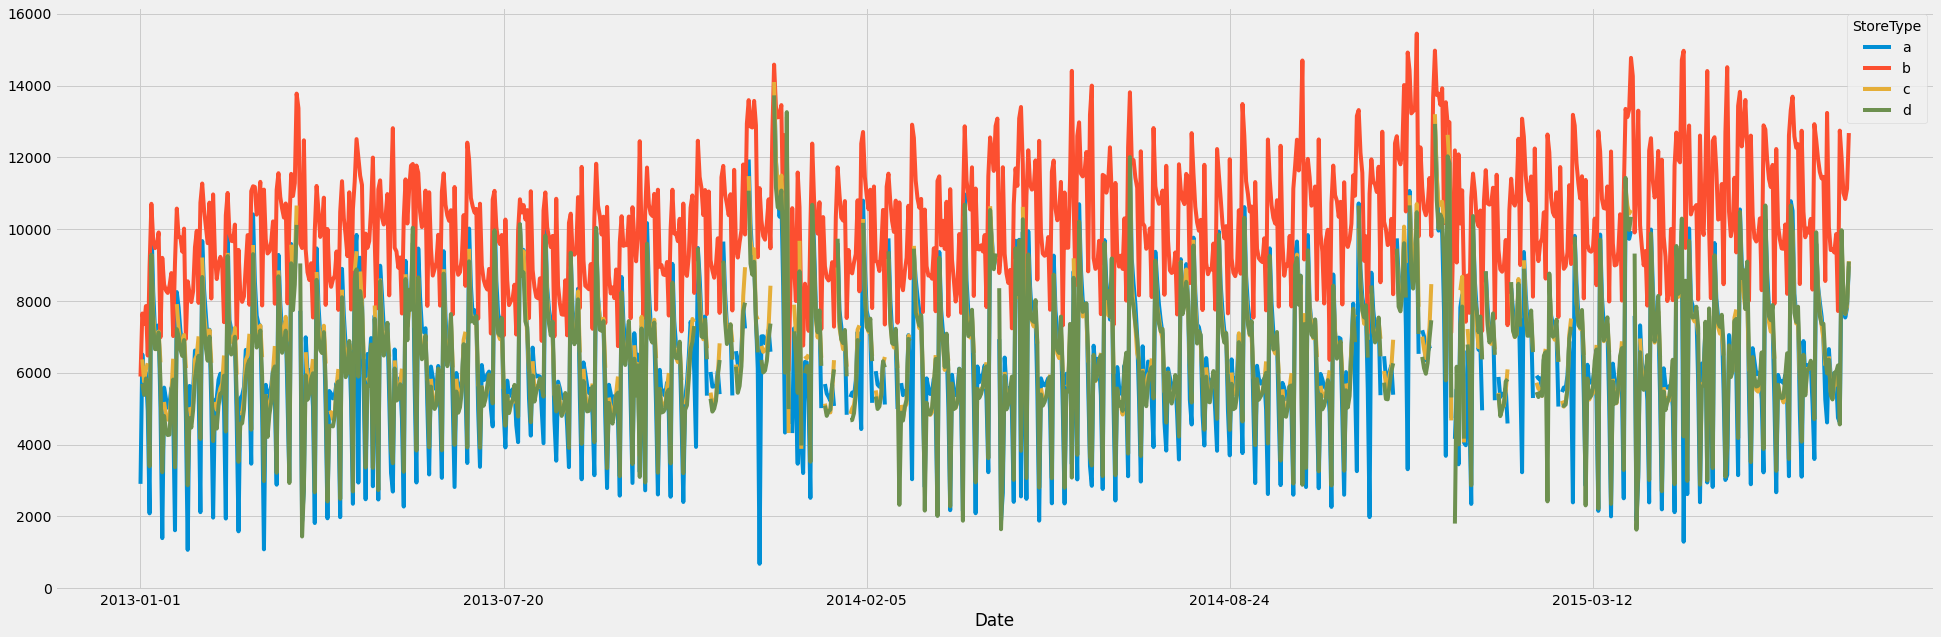

In [30]:
# Lets see the different types of stores
fig, ax = plt.subplots(figsize = (30, 10))
sales_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

# Type b stores have higher sales than types a,c and d.

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

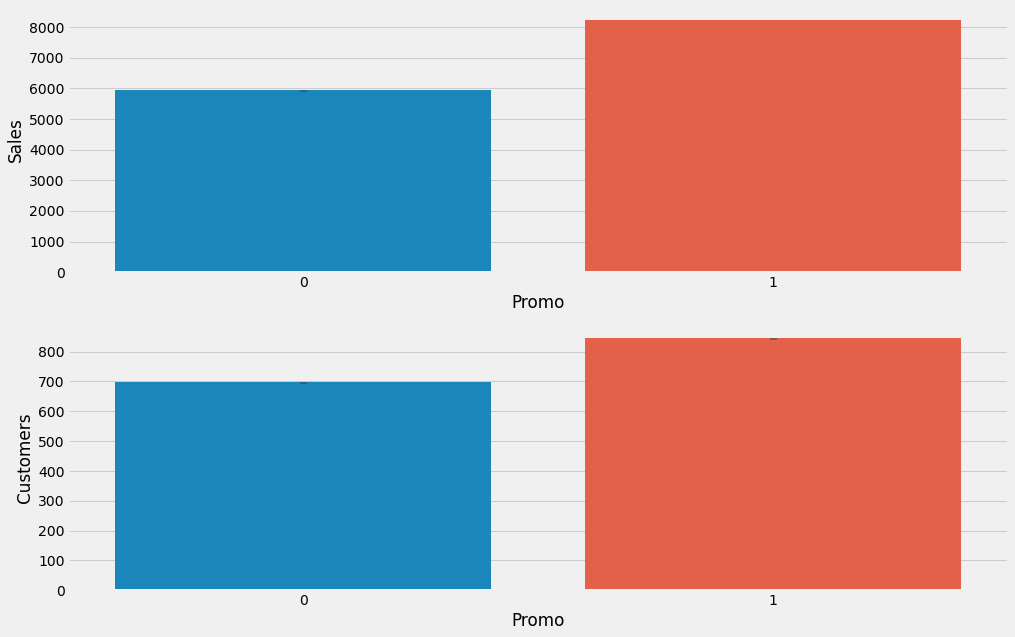

In [31]:
# Lets also check how promo is working
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = sales_df)

plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = sales_df)

# Promo looks good, sales grow from 6000e to 8000€.

### Forecast using fbprophet

In [32]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [33]:
# Def a function to make our forecasting. 

def sales_prediction(Store_ID, sales_df, periods):
    # We do the forecast for a single store, defined by the store ID.
    sales_df = sales_df[sales_df['Store']==Store_ID] 
    
    # fbprophet works with 2 columns: 'ds' with the date and 'y' with the target. Modify the df to have both columns.
    sales_df = sales_df[['Date', 'Sales']].rename(columns={'Date':'ds', 'Sales':'y'}) 
    
    # Sort the values by date.
    sales_df = sales_df.sort_values('ds')
    
    # Start making our model and fit the data.
    model=Prophet().fit(sales_df)
    
    # Start making our forecast
    future=model.make_future_dataframe(periods=periods)
    forecast=model.predict(future)
    
    # Plot the data
    figure=model.plot(forecast, xlabel='Fecha', ylabel='Ventas', figsize=(20,5))
    figure2=model.plot_components(forecast, figsize=(20,7))

    return forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


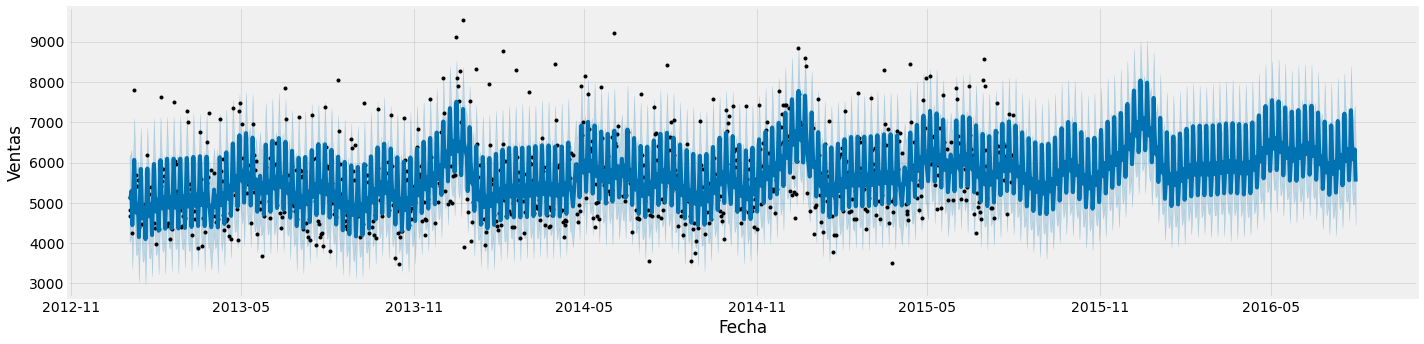

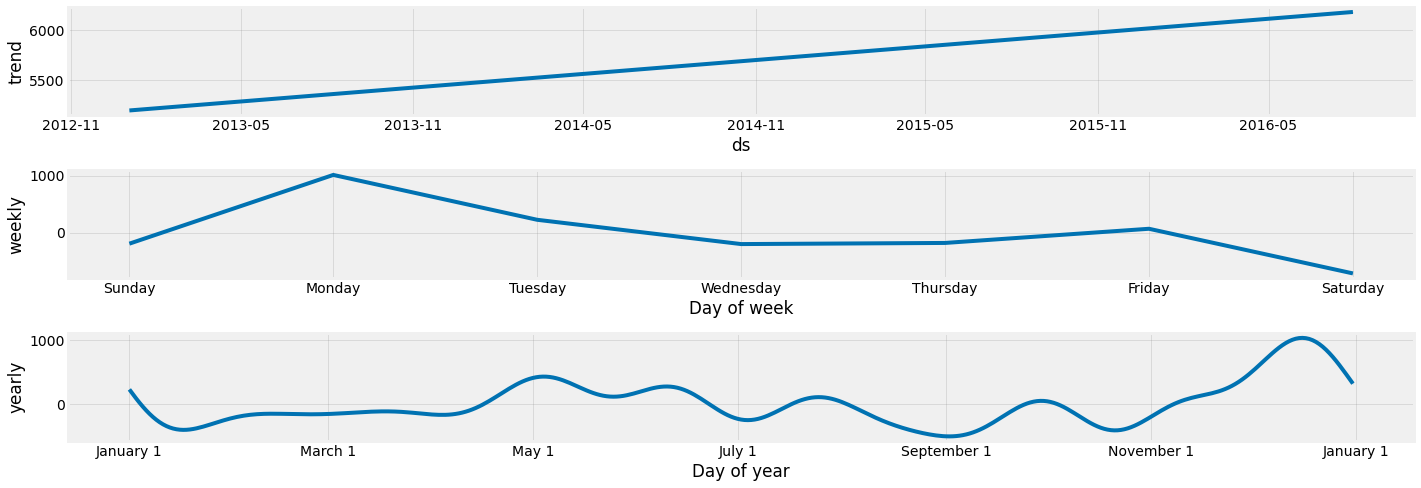

In [34]:
# We can make a forecasting for the store 10, for 365 days.
df1 = sales_prediction(10, sales_df, 365)


In [35]:
# Now we include the different holidays.

def sales_prediction_with_holidays(Store_ID, sales_df, periods):
    # We do the forecast for a single store, defined by the store ID.
    sales_df = sales_df[sales_df['Store']==Store_ID] 
    
    # fbprophet works with 2 columns: 'ds' with the date and 'y' with the target. Modify the df to have both columns.
    sales_prophet_df = sales_df[['Date', 'Sales']].rename(columns={'Date':'ds', 
                                                                   'Sales':'y'}) 
    
    # Sort the values by date.
    sales_prophet_df = sales_prophet_df.sort_values('ds')
    
    # Holidays
    
    # School holidays:
    # Take values of date when 'SchoolHolidays' == 1
    school_holidays = sales_df[sales_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
    # Make a dataframe with Prophet format, a column 'ds' with dates and a column 'holiday' with the holiday type
    school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays), 
                                    'holiday': 'school_holiday'})
    
    # State holidays:
    # We are going to do the same for each type of state holidays:
    
    # Bank holidays:
    bank_holidays = sales_df[(sales_df['StateHoliday'] == 'a')].loc[:, 'Date'].values
    bank_holidays = pd.DataFrame({'ds': pd.to_datetime(bank_holidays), 
                                   'holiday': 'bank_holiday'})
    # Easter holidays:
    easter_holidays = sales_df[(sales_df['StateHoliday'] == 'b')].loc[:, 'Date'].values
    easter_holidays = pd.DataFrame({'ds': pd.to_datetime(easter_holidays), 
                                   'holiday': 'easter_holiday'})
    
    # Christmas holidays:
    christmas_holidays = sales_df[(sales_df['StateHoliday'] == 'c')].loc[:, 'Date'].values
    christmas_holidays = pd.DataFrame({'ds': pd.to_datetime(christmas_holidays), 
                                   'holiday': 'christmas_holiday'})
    
    holidays = pd.concat((bank_holidays,easter_holidays, christmas_holidays, school_holidays), axis = 0)
    
    # Start making our model and fit the data.
    model=Prophet(holidays=holidays).fit(sales_prophet_df)
    
    # Start making our forecast
    future=model.make_future_dataframe(periods=periods)
    forecast=model.predict(future)
    
    # Plot the data
    figure=model.plot(forecast, xlabel='Fecha', ylabel='Ventas', figsize=(20,5))
    figure2=model.plot_components(forecast, figsize=(20,9))
    return forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


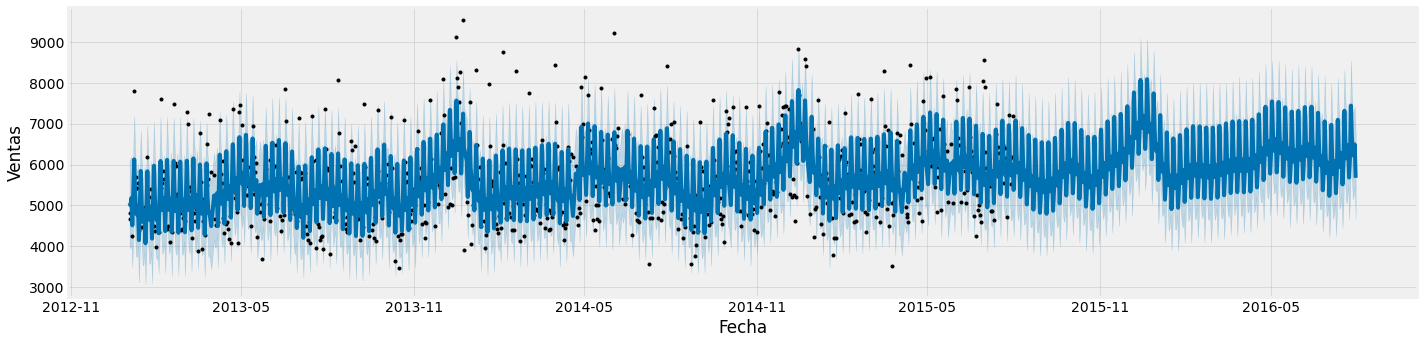

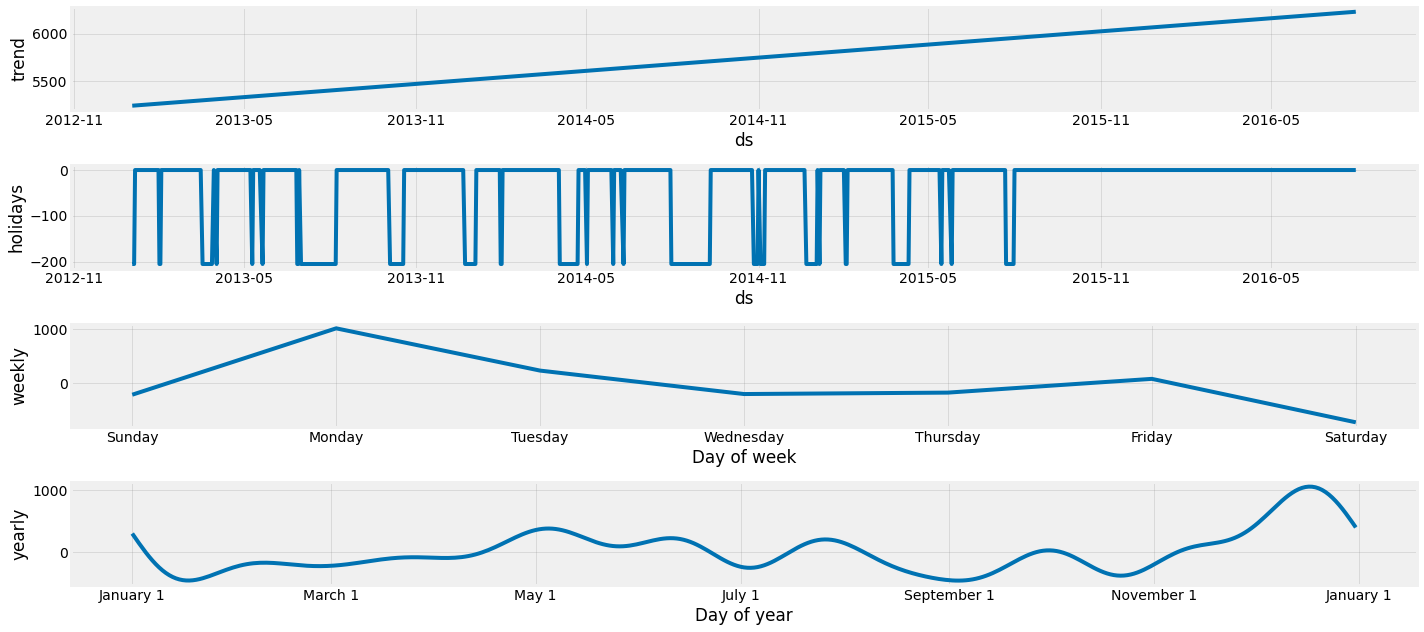

In [36]:
# We do the same prediction, store 10 and 365 days.
df2 = sales_prediction_with_holidays(10, sales_df, 365)


Text(0.5, 0, 'Date')

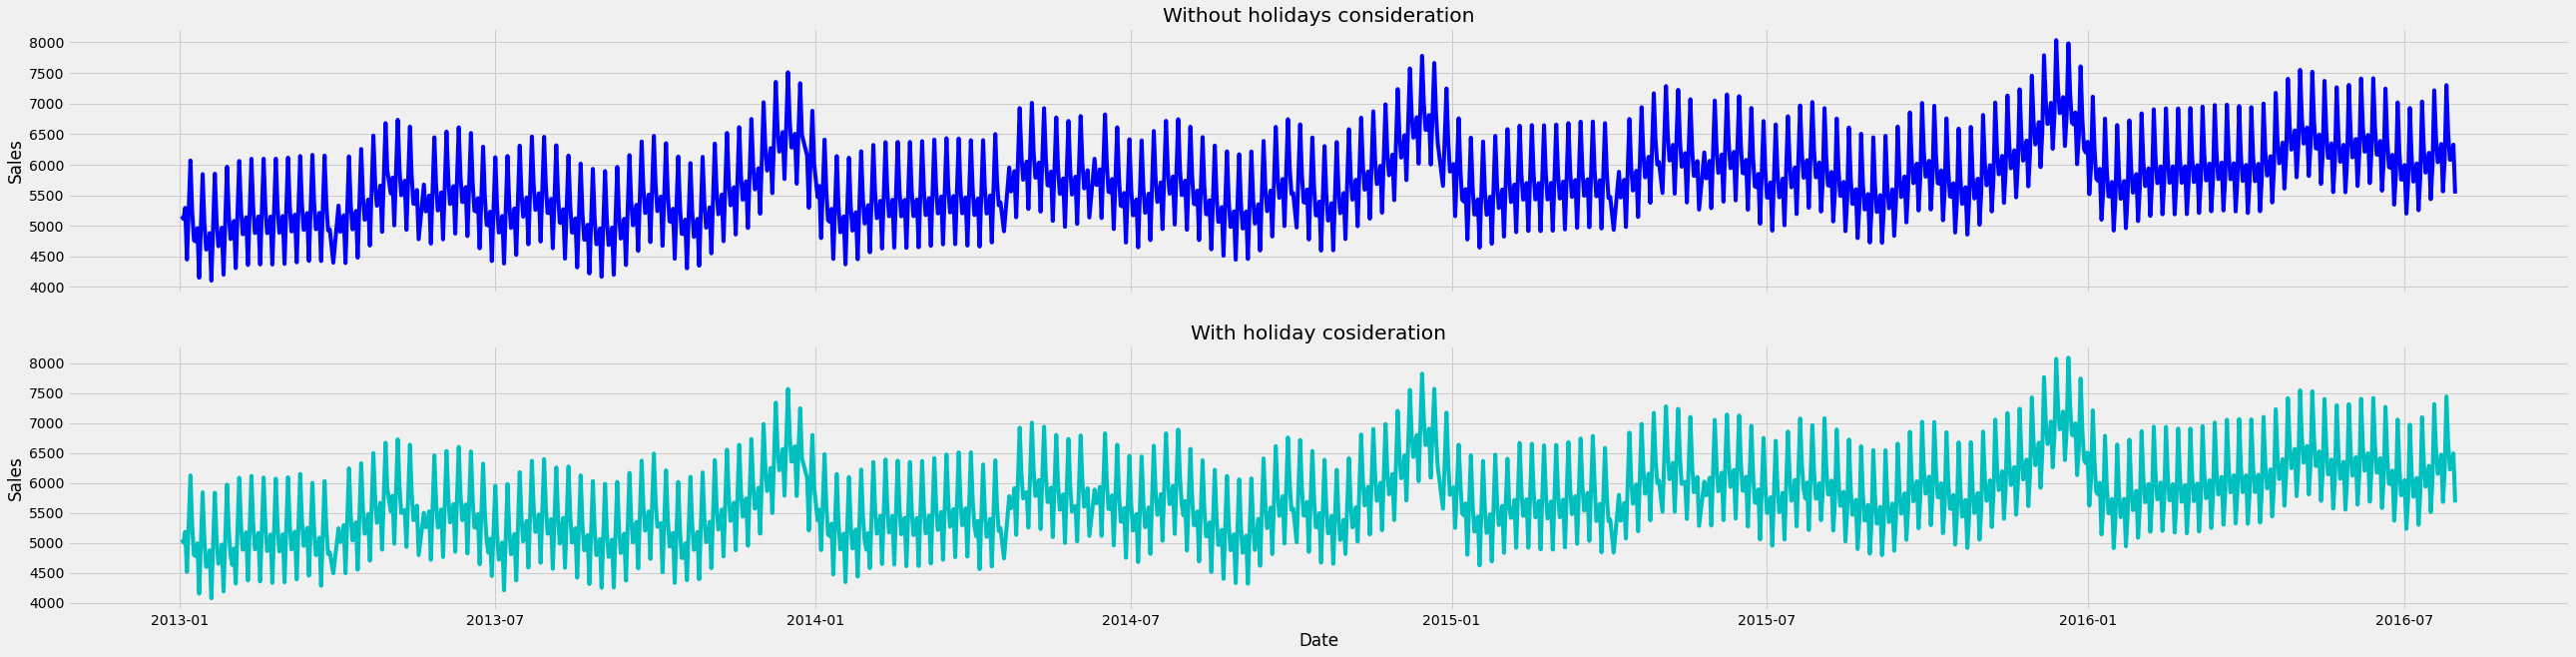

In [37]:
# We can plot both predictions together

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(40,10))

ax1.plot(df1['ds'], df1['yhat'], 'b-')
ax1.set_title('Without holidays consideration')
ax1.set_ylabel('Sales')

ax2.plot(df2['ds'], df2['yhat'], 'c-')
ax2.set_title('With holiday cosideration')
ax2.set_ylabel('Sales')
ax2.set_xlabel('Date')

We can appreciate both graphs are slightly different when we include holidays.